# Homework 5

# Varun Thakur

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.tree import _tree
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# 1(a) Download the Accute Inflamations data from https://archive.ics.uci.edu/ ml/datasets/Acute+Inflammations.

In [3]:
df = pd.read_csv("../data/diagnosis.csv",encoding="utf-16",sep="\t",names=["Temperature","Nausea","Lumbar Pain","Urine Pushing","Micturition Pains","Burning of Urethra, itch, swelling of urethra outlet","Urinary Bladder Inflammation","Nephritis of Renal Pelvis Origin"])
df

,Temperature,Nausea,Lumbar Pain,Urine Pushing,Micturition Pains,"Burning of Urethra, itch, swelling of urethra outlet",Urinary Bladder Inflammation,Nephritis of Renal Pelvis Origin
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,"41,4",no,yes,yes,no,yes,no,yes
116,"41,5",no,no,no,no,no,no,no
117,"41,5",yes,yes,no,yes,no,no,yes
118,"41,5",no,yes,yes,no,yes,no,yes


In [4]:
df = df.replace(',', '.',regex=True)
df = df.replace({"yes":1,"no":0})
df

,Temperature,Nausea,Lumbar Pain,Urine Pushing,Micturition Pains,"Burning of Urethra, itch, swelling of urethra outlet",Urinary Bladder Inflammation,Nephritis of Renal Pelvis Origin
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


# 1(b) Build a decision tree on the whole data set and plot it.
# 1(c) Convert the decision rules into a set of IF-THEN rules.

### Decision Tree for Urinary Bladder Inflammation Prediction

[Text(0.4, 0.875, 'x[3] <= 0.5\ngini = 0.5\nsamples = 120\nvalue = [61, 59]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.6, 0.625, 'x[4] <= 0.5\ngini = 0.387\nsamples = 80\nvalue = [21, 59]'),
 Text(0.4, 0.375, 'x[2] <= 0.5\ngini = 0.437\nsamples = 31\nvalue = [21, 10]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 49\nvalue = [0, 49]')]

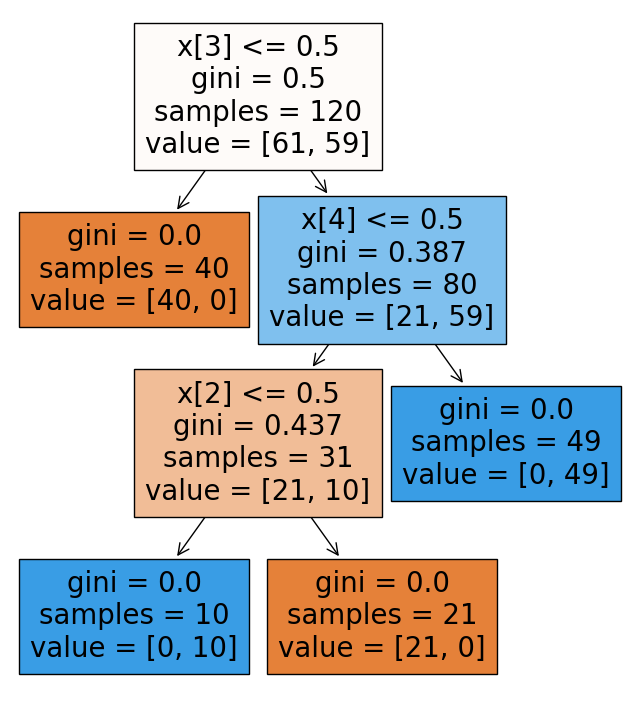

In [5]:
x_uri = df.drop(["Urinary Bladder Inflammation", "Nephritis of Renal Pelvis Origin"], axis=1)
y_uri = df["Urinary Bladder Inflammation"]
decision_tree_uri = DecisionTreeClassifier(random_state=24)
decision_tree_uri.fit(x_uri,y_uri)
plt.figure(figsize=(8, 9))
plot_tree(decision_tree_uri,filled=True)

### Decision Rules for Urinary Bladder Inflammation Prediction

In [6]:
feature_names=["Temperature","Nausea","Lumbar Pain","Urine Pushing","Micturition Pains","Burning of Urethra, itch, swelling of urethra outlet"]
tree_ = decision_tree_uri.tree_
feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
]
print("def tree({}):".format(", ".join(feature_names)))

def recurse(node, depth): 
        indent=" "*depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
                name = feature_name[node]
                threshold = tree_.threshold[node]
                print("{}if {} <= {}:".format(indent, name, threshold))
                recurse(tree_.children_left[node], depth + 1)
                print("{}else:  # if {} > {}".format(indent, name, threshold))
                recurse(tree_.children_right[node], depth + 1)
        else:
                print("{}return {}".format(indent, tree_.value[node]))
recurse(0, 1)

def tree(Temperature, Nausea, Lumbar Pain, Urine Pushing, Micturition Pains, Burning of Urethra, itch, swelling of urethra outlet):
 if Urine Pushing <= 0.5:
  return [[40.  0.]]
 else:  # if Urine Pushing > 0.5
  if Micturition Pains <= 0.5:
   if Lumbar Pain <= 0.5:
    return [[ 0. 10.]]
   else:  # if Lumbar Pain > 0.5
    return [[21.  0.]]
  else:  # if Micturition Pains > 0.5
   return [[ 0. 49.]]


### Decision Tree for Nephritis of Renal Pelvis Prediction

[Text(0.4, 0.8333333333333334, 'x[0] <= 37.95\ngini = 0.486\nsamples = 120\nvalue = [70, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(0.6, 0.5, 'x[2] <= 0.5\ngini = 0.278\nsamples = 60\nvalue = [10, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]')]

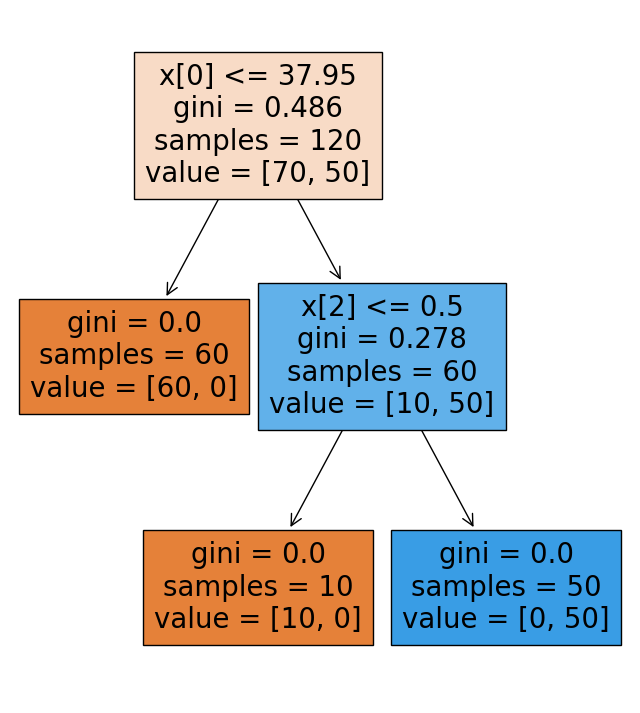

In [7]:
x_neph = df.drop(["Urinary Bladder Inflammation", "Nephritis of Renal Pelvis Origin"], axis=1)
y_neph = df["Nephritis of Renal Pelvis Origin"]
decision_tree_neph = DecisionTreeClassifier(random_state=24)
decision_tree_neph.fit(x_neph,y_neph)
plt.figure(figsize=(8, 9))
plot_tree(decision_tree_neph,filled=True)

### Decision Rules for Nephritis of Renal Pelvis Prediction

In [8]:
feature_names=["Temperature","Nausea","Lumbar Pain","Urine Pushing","Micturition Pains","Burning of Urethra, itch, swelling of urethra outlet"]
tree_ = decision_tree_neph.tree_
feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
]
print("def tree({}):".format(", ".join(feature_names)))

def recurse(node, depth): 
        indent=" "*depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
                name = feature_name[node]
                threshold = tree_.threshold[node]
                print("{}if {} <= {}:".format(indent, name, threshold))
                recurse(tree_.children_left[node], depth + 1)
                print("{}else:  # if {} > {}".format(indent, name, threshold))
                recurse(tree_.children_right[node], depth + 1)
        else:
                print("{}return {}".format(indent, tree_.value[node]))
recurse(0, 1)

def tree(Temperature, Nausea, Lumbar Pain, Urine Pushing, Micturition Pains, Burning of Urethra, itch, swelling of urethra outlet):
 if Temperature <= 37.95000076293945:
  return [[60.  0.]]
 else:  # if Temperature > 37.95000076293945
  if Lumbar Pain <= 0.5:
   return [[10.  0.]]
  else:  # if Lumbar Pain > 0.5
   return [[ 0. 50.]]


### Decision Tree for Urinary Bladder Inflammation and Nephritis of Renal Pelvis Prediction

In [9]:
x = df.drop(["Urinary Bladder Inflammation", "Nephritis of Renal Pelvis Origin"], axis=1)
y = df[["Urinary Bladder Inflammation","Nephritis of Renal Pelvis Origin"]]

[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'x[2] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

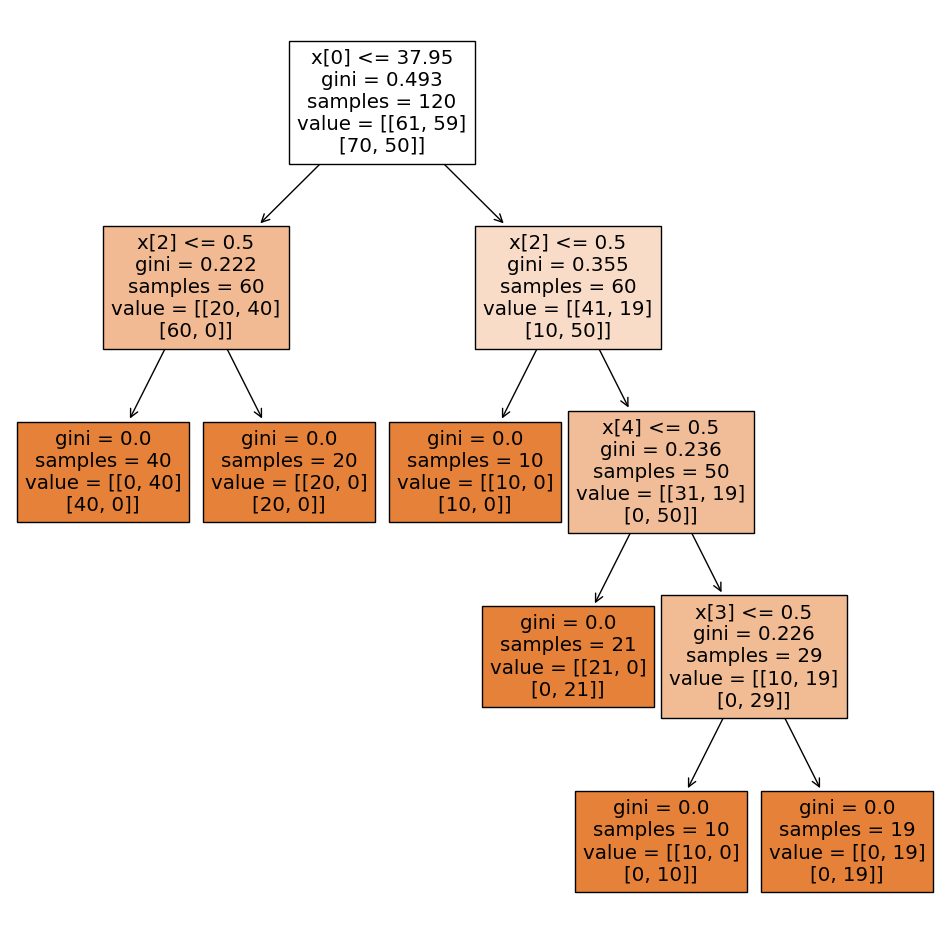

In [10]:
decision_tree = DecisionTreeClassifier(random_state=24)
decision_tree.fit(x,y)
plt.figure(figsize=(12, 12))
plot_tree(decision_tree,filled=True)

### Decision Rules for Urinary Bladder Inflammation and Nephritis of Renal Pelvis Prediction

In [11]:
feature_names=["Temperature","Nausea","Lumbar Pain","Urine Pushing","Micturition Pains","Burning of Urethra, itch, swelling of urethra outlet"]
tree_ = decision_tree.tree_
feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
]
print("def tree({}):".format(", ".join(feature_names)))

def recurse(node, depth): 
        indent=" "*depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
                name = feature_name[node]
                threshold = tree_.threshold[node]
                print("{}if {} <= {}:".format(indent, name, threshold))
                recurse(tree_.children_left[node], depth + 1)
                print("{}else:  # if {} > {}".format(indent, name, threshold))
                recurse(tree_.children_right[node], depth + 1)
        else:
                print("{}return {}".format(indent, tree_.value[node]))
recurse(0, 1)

def tree(Temperature, Nausea, Lumbar Pain, Urine Pushing, Micturition Pains, Burning of Urethra, itch, swelling of urethra outlet):
 if Temperature <= 37.95000076293945:
  if Lumbar Pain <= 0.5:
   return [[ 0. 40.]
 [40.  0.]]
  else:  # if Lumbar Pain > 0.5
   return [[20.  0.]
 [20.  0.]]
 else:  # if Temperature > 37.95000076293945
  if Lumbar Pain <= 0.5:
   return [[10.  0.]
 [10.  0.]]
  else:  # if Lumbar Pain > 0.5
   if Micturition Pains <= 0.5:
    return [[21.  0.]
 [ 0. 21.]]
   else:  # if Micturition Pains > 0.5
    if Urine Pushing <= 0.5:
     return [[10.  0.]
 [ 0. 10.]]
    else:  # if Urine Pushing > 0.5
     return [[ 0. 19.]
 [ 0. 19.]]


# 1(d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

In [12]:
classifier_tree = DecisionTreeClassifier(random_state=24)
path = classifier_tree.cost_complexity_pruning_path(x, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

### Cost Complexity Decision Tree 

0.000


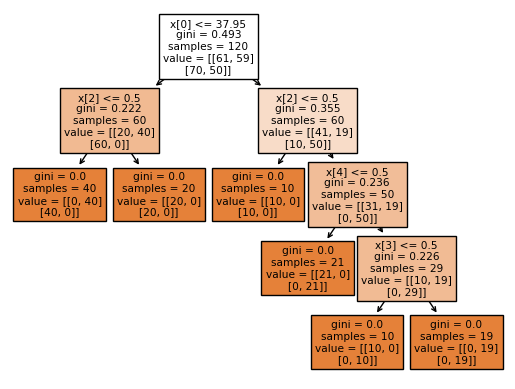

In [13]:
cv_scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=24,ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf, x, y, cv=5)
    cv_scores.append(np.mean(scores))

best_alpha = ccp_alphas[np.argmax(cv_scores)]

optimal_tree = DecisionTreeClassifier(random_state=24,ccp_alpha=best_alpha)
optimal_tree.fit(x, y)
plot_tree(optimal_tree,filled=True)

print(format(best_alpha, '.3f'))

### Cost Complexity Decision Rules

In [14]:
feature_names=["Temperature","Nausea","Lumbar Pain","Urine Pushing","Micturition Pains","Burning of Urethra, itch, swelling of urethra outlet"]
tree_ = optimal_tree.tree_
feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
]
print("def tree({}):".format(", ".join(feature_names)))

def recurse(node, depth): 
        indent=" "*depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
                name = feature_name[node]
                threshold = tree_.threshold[node]
                print("{}if {} <= {}:".format(indent, name, threshold))
                recurse(tree_.children_left[node], depth + 1)
                print("{}else:  # if {} > {}".format(indent, name, threshold))
                recurse(tree_.children_right[node], depth + 1)
        else:
                print("{}return {}".format(indent, tree_.value[node]))
recurse(0, 1)

def tree(Temperature, Nausea, Lumbar Pain, Urine Pushing, Micturition Pains, Burning of Urethra, itch, swelling of urethra outlet):
 if Temperature <= 37.95000076293945:
  if Lumbar Pain <= 0.5:
   return [[ 0. 40.]
 [40.  0.]]
  else:  # if Lumbar Pain > 0.5
   return [[20.  0.]
 [20.  0.]]
 else:  # if Temperature > 37.95000076293945
  if Lumbar Pain <= 0.5:
   return [[10.  0.]
 [10.  0.]]
  else:  # if Lumbar Pain > 0.5
   if Micturition Pains <= 0.5:
    return [[21.  0.]
 [ 0. 21.]]
   else:  # if Micturition Pains > 0.5
    if Urine Pushing <= 0.5:
     return [[10.  0.]
 [ 0. 10.]]
    else:  # if Urine Pushing > 0.5
     return [[ 0. 19.]
 [ 0. 19.]]


# 2(a) Download the Communities and Crime data3 from https://archive.ics.uci. edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.

Find and replace on excel was used to expedite extraction of individual column names from communities.names

In [15]:
col_names=["state", "county", "community", "communityname", "fold", "population", "householdsize", "racepctblack", 
    "racePctWhite", "racePctAsian", "racePctHisp", "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up", 
    "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", 
    "pctWRetire", "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap", 
    "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad", 
    "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu", "PctEmplProfServ", "PctOccupManu", 
    "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", 
    "PctFam2Par", "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom", 
    "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10", 
    "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10", "PctSpeakEnglOnly", "PctNotSpeakEnglWell", 
    "PctLargHouseFam", "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous", 
    "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup", 
    "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", 
    "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ", "MedRent", 
    "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", "PctForeignBorn", 
    "PctBornSameState", "PctSameHouse85", "PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", 
    "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic", 
    "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", 
    "PctPolicMinor", "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens", 
    "PctUsePubTrans", "PolicCars", "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy", 
    "LemasPctOfficDrugUn", "PolicBudgPerPop", "ViolentCrimesPerPop"]
df_communities = pd.read_csv("../data/communities.csv",names=col_names)

train_df_all = df_communities[:1495]
test_df_all = df_communities[1495:]

In [16]:
train_df = train_df_all.drop(train_df_all.columns[0:5], axis=1)
test_df = test_df_all.drop(test_df_all.columns[0:5], axis=1)
train_df = train_df.replace('?', np.nan)
test_df = test_df.replace('?', np.nan)

In [17]:
train_df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,NaN,NaN,NaN,NaN,0.00,NaN,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,NaN,NaN,NaN,NaN,0.00,NaN,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


# 2(b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [18]:
imputation_train = SimpleImputer(missing_values=np.nan, strategy='median')
imputation_train.fit(train_df)
train_df = pd.DataFrame(imputation_train.transform(train_df),columns=train_df.columns)
display(train_df)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.07,0.03,0.76,0.5,0.00,0.15,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.07,0.03,0.76,0.5,0.00,0.15,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.07,0.03,0.76,0.5,0.00,0.15,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.07,0.03,0.76,0.5,0.00,0.15,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.03


In [19]:
imputation_test = SimpleImputer(missing_values=np.nan, strategy='median')
imputation_test.fit(test_df)
test_df = pd.DataFrame(imputation_test.transform(test_df),columns=test_df.columns)
display(test_df)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.08,0.03,0.73,0.5,0.00,0.165,0.12
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.08,0.03,0.73,0.5,0.00,0.165,0.11
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.08,0.03,0.73,0.5,0.00,0.165,0.12
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.08,0.03,0.73,0.5,0.00,0.165,0.06
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.08,0.03,0.73,0.5,0.00,0.165,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.08,0.03,0.73,0.5,0.00,0.165,0.09
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.08,0.03,0.73,0.5,0.00,0.165,0.45
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.280,0.23
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.180,0.19


# 2(c) Plot a correlation matrix for the features in the data set.

Text(0.5, 1.0, 'Correlation Matrix of Dataset Features')

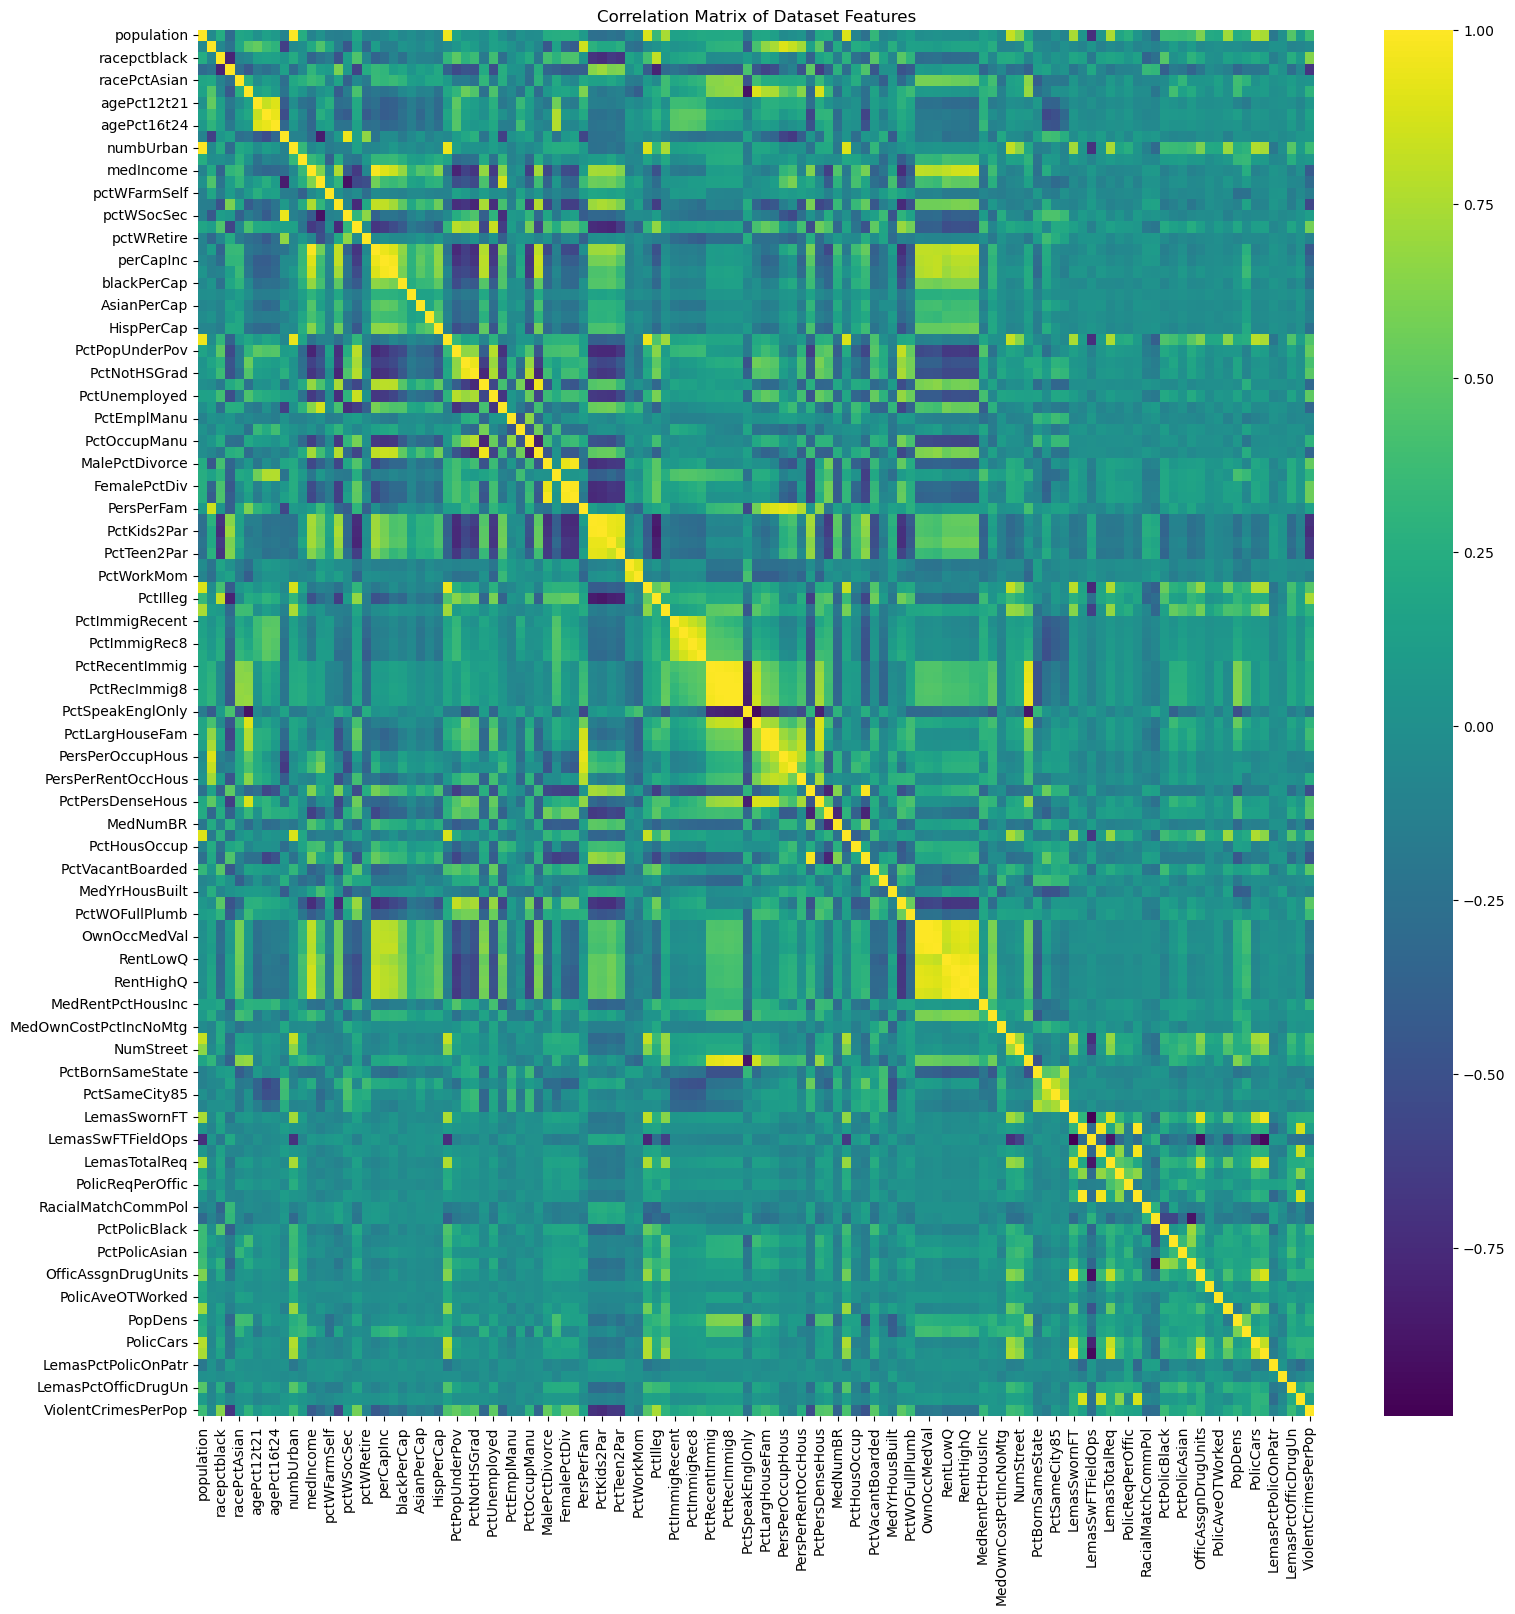

In [20]:
dataset_features = pd.concat([train_df,test_df])
corr_matrix = dataset_features.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, cmap='viridis')
plt.title('Correlation Matrix of Dataset Features')

   Strong positive correlations can be noted by bright yellow areas. The following variables are examples of highly positively correlated with each other as seen above.

OwnOccMedVal (owner occupied housing - median value) and RentLowQ (rental housing - lower quartile rent) and 
RentHighQ (rental housing - upper quartile rent)

PctRecImmig8 (percent of _population_ who have immigrated within the last 8 years) and PctRecentImmig (percent of _population_ who have immigrated within the last 3 years)

perCapinc (per capita income) and blackPerCap (per capita income for african americans)

Strong negative correlations are noted by dark purple areas. The following variables are examples of highly negatively correlated with each other as seen above.

PctPopUnderPov (percentage of people under the poverty level) and PctNotHSGrad (percentage of people 25 and over that are not high school graduates) both are negatively correlated with OwnOccMedVal (owner occupied housing - median value) and RentLowQ (rental housing - lower quartile rent) and RentHighQ (rental housing - upper quartile rent)


FemalePctDiv (percentage of females who are divorced) and PctKids2Parents (percentage of kids in family housing with two parents)

# 2(d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m , in which s is sample standard deviation and m is sample mean.

In [21]:
coefficient_cv_dict = {}
for feature in dataset_features.columns:
    s = dataset_features[[feature]].std().item() 
    m = dataset_features[[feature]].mean().item()
    coefficient_cv = s / m
    coefficient_cv_dict[feature]=coefficient_cv
df = pd.DataFrame(coefficient_cv_dict.items(), columns=['Feature', 'Coefficient_CV'])
display(df)

,Feature,Coefficient_CV
0,population,2.203503
1,householdsize,0.353298
2,racepctblack,1.410920
3,racePctWhite,0.323782
4,racePctAsian,1.359162
...,...,...
118,LemasPctPolicOnPatr,0.119000
119,LemasGangUnitDeploy,0.333483
120,LemasPctOfficDrugUn,2.555266
121,PolicBudgPerPop,0.422669


# 2(e) Pick floor(sqrt(128)) features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

floor(SQRT(128)) = 11

In [22]:
top_11_features_df = df.sort_values(by='Coefficient_CV', ascending=False).head(11)
print(top_11_features_df)

                 Feature  Coefficient_CV
108        PctPolicAsian        5.447835
90             NumStreet        4.407702
89         NumInShelters        3.485481
49              NumIlleg        2.994196
51              NumImmig        2.900497
120  LemasPctOfficDrugUn        2.555266
27           NumUnderPov        2.304970
0             population        2.203503
10             numbUrban        2.001744
96          LemasSwornFT        2.001590
71            HousVacant        1.958780


## Scatterplots

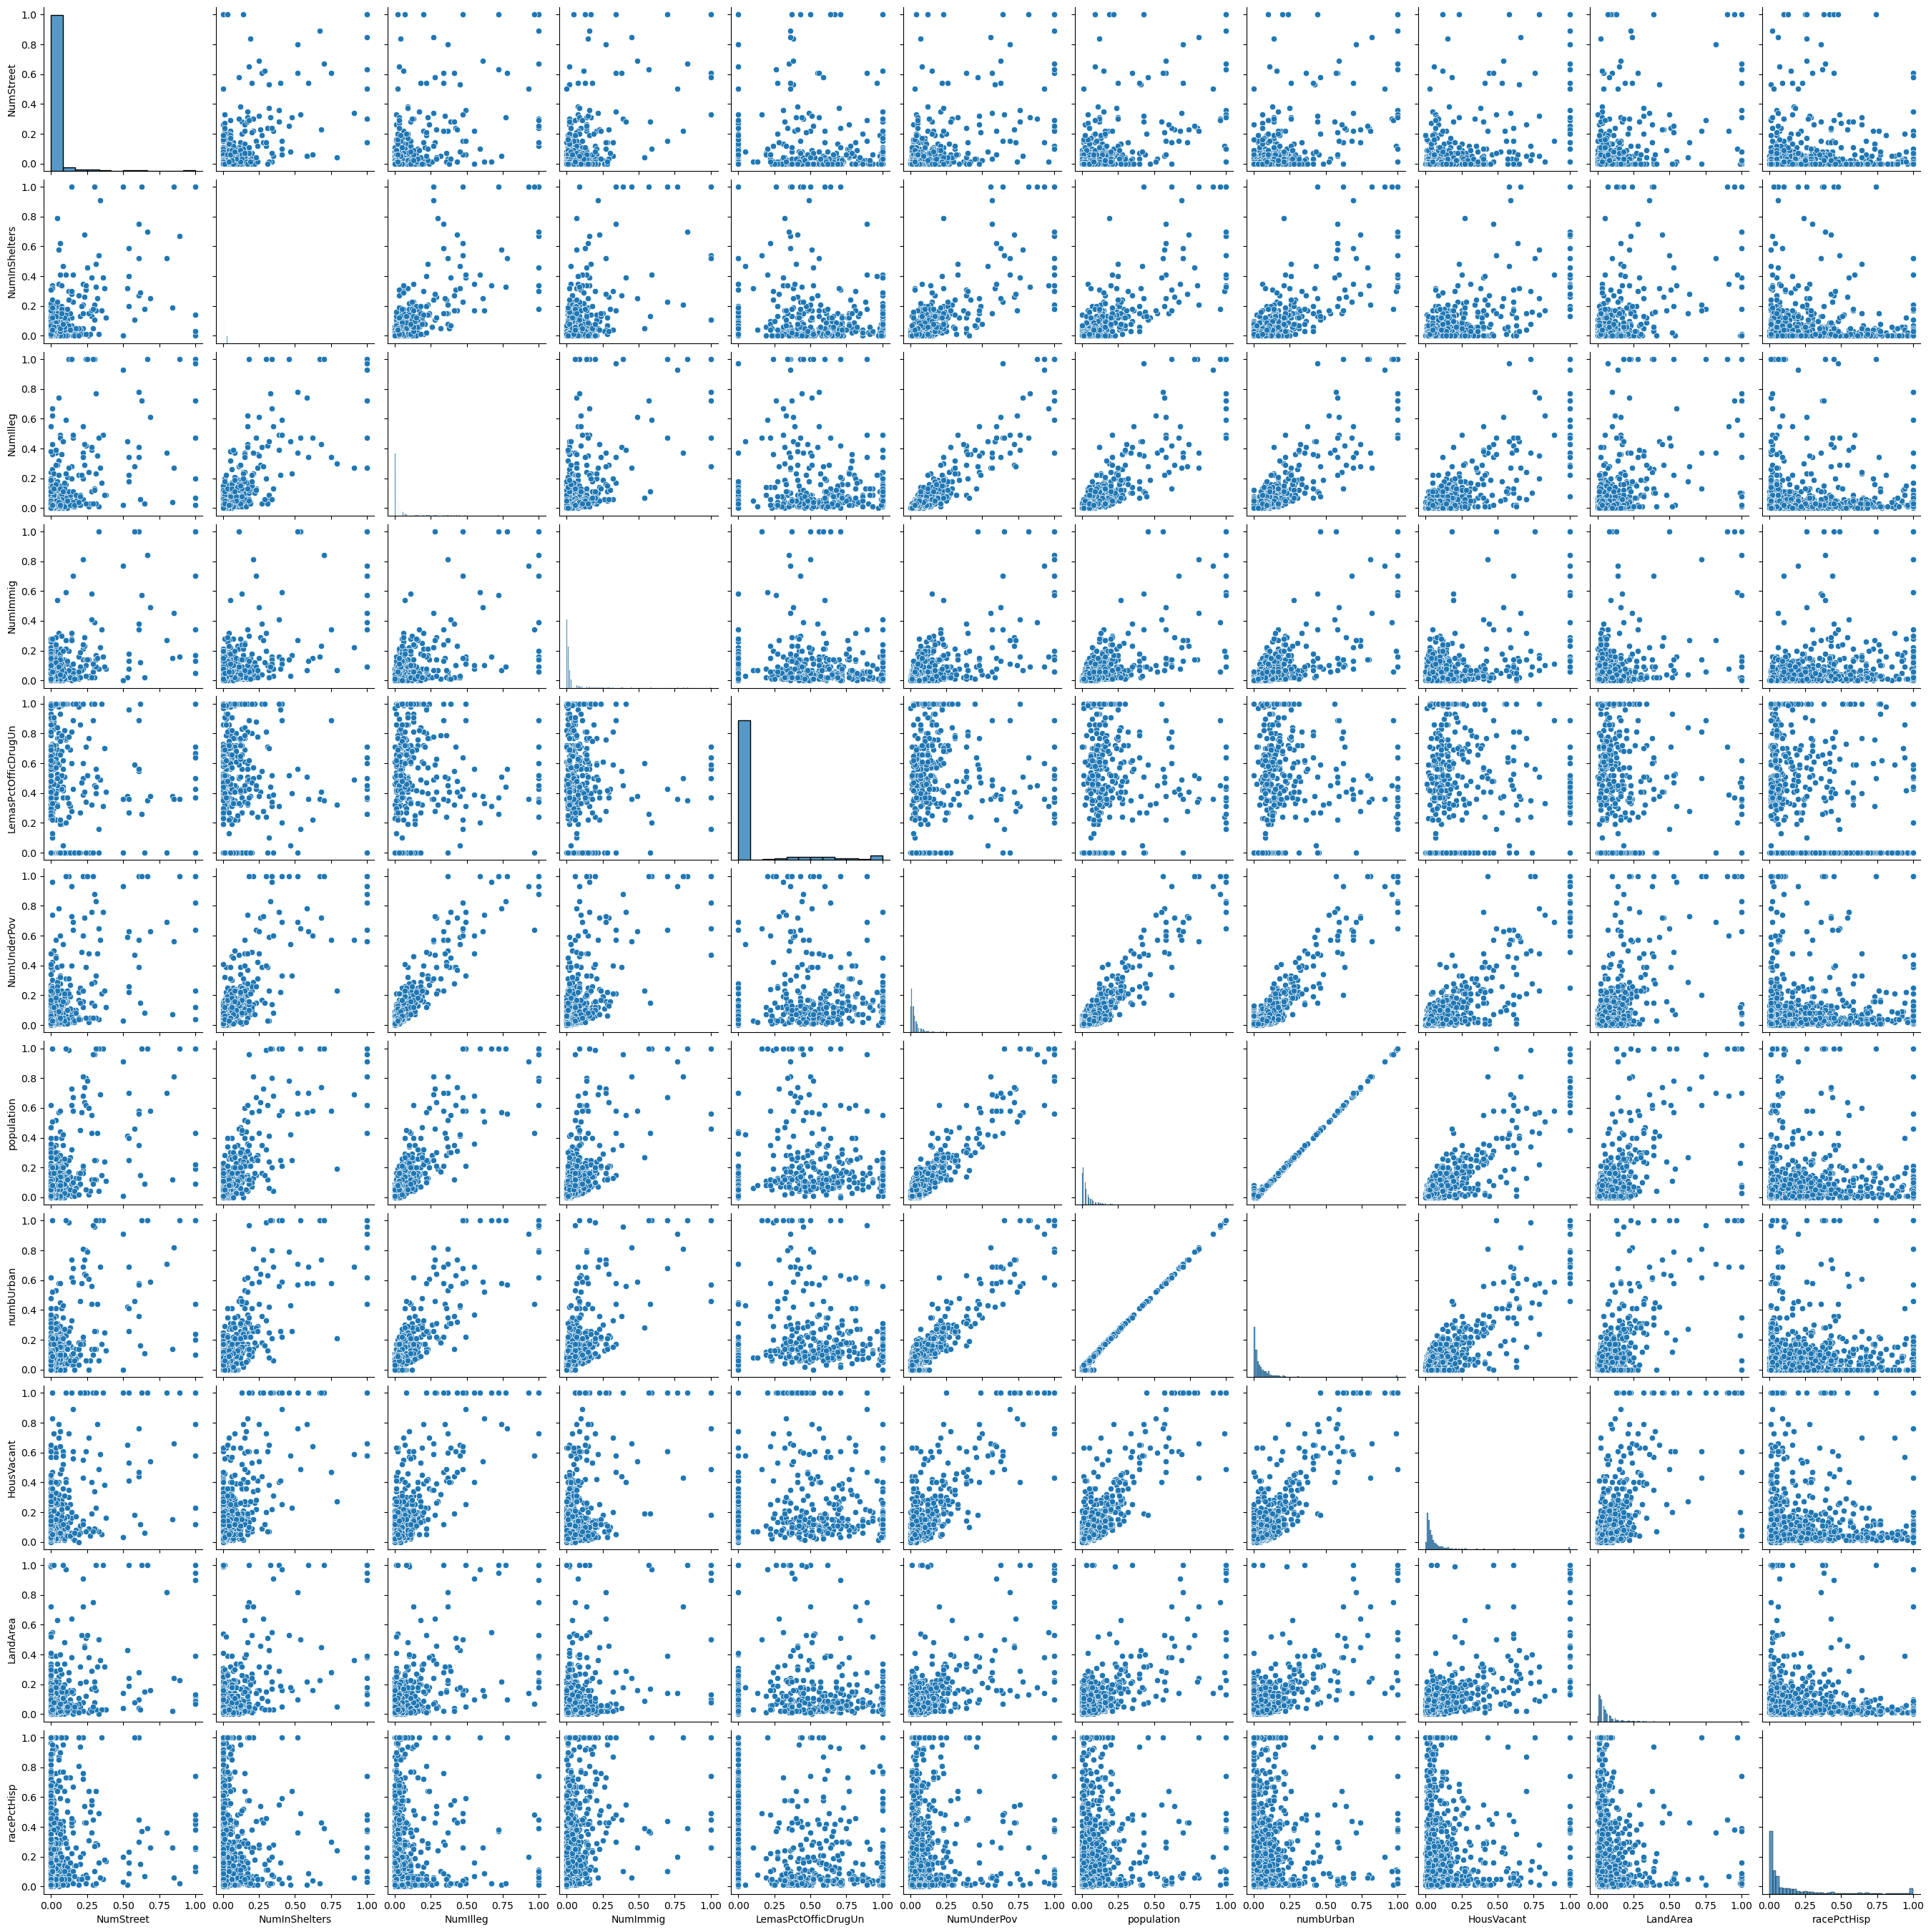

In [23]:
top11_features = dataset_features[["NumStreet","NumInShelters","NumIlleg","NumImmig","LemasPctOfficDrugUn","NumUnderPov","population","numbUrban","HousVacant","LandArea","racePctHisp"]]
sns.pairplot(top11_features)

From the scatter plots we can see some correlations. Notably the number of people living in areas classified as urban (numbUrban) and population for community (population) were highly positively correlated. 

Another notable positive correlation, although not as strong, is between number of people under the poverty level (NumUnderPov) and number of kids born to never married (NumIlleg).

The number of kids born to never married (NumIlleg) has some positive correlation with population for community (population) and the number of people living in areas classified as urban (numbUrban).

There is also a strong positive correlation between the number of people living in areas classified as urban (numbUrban) and the number of people under the poverty level (NumUnderPov).

There is also a strong positive correlation between the number of people under the poverty level (NumUnderPov) and the population for community (population)

The above correlations were the most prominent. Data points in each plot tend to be clustered into one singular area.

#### Correlation Matrix for Top 11 Features Made for Visualization

Text(0.5, 1.0, 'Correlation Matrix of Top 11 Dataset Features')

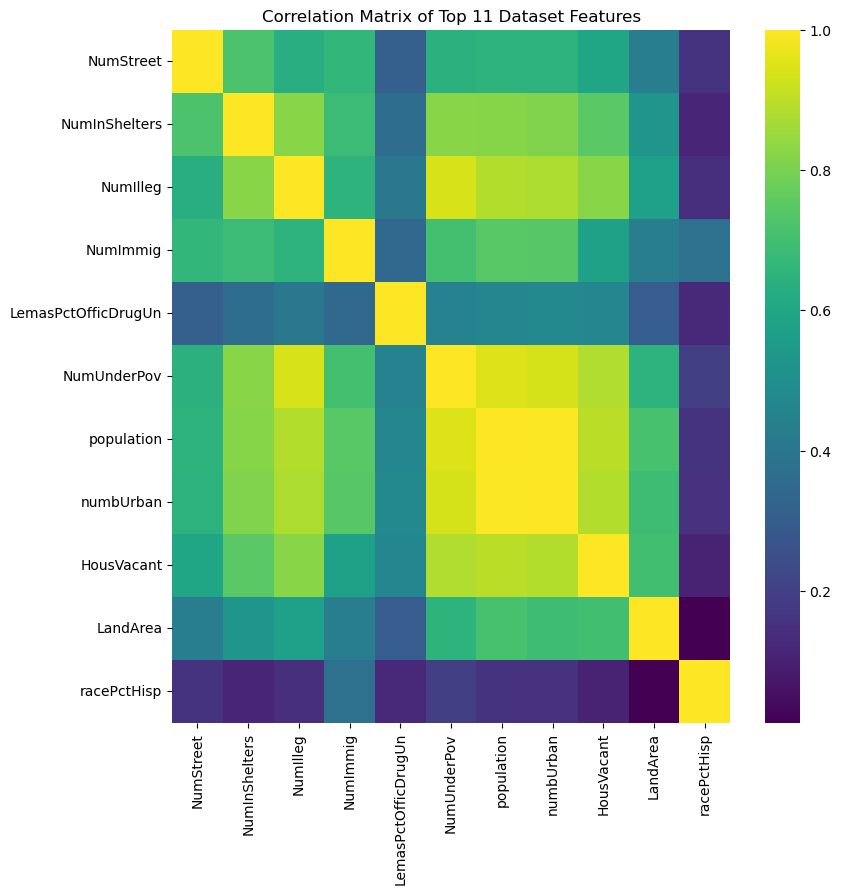

In [24]:
top11_correlation_matrix = top11_features.corr()
plt.figure(figsize=(9, 9))
sns.heatmap(top11_correlation_matrix, cmap='viridis')
plt.title('Correlation Matrix of Top 11 Dataset Features')

## Boxplots

<Axes: >

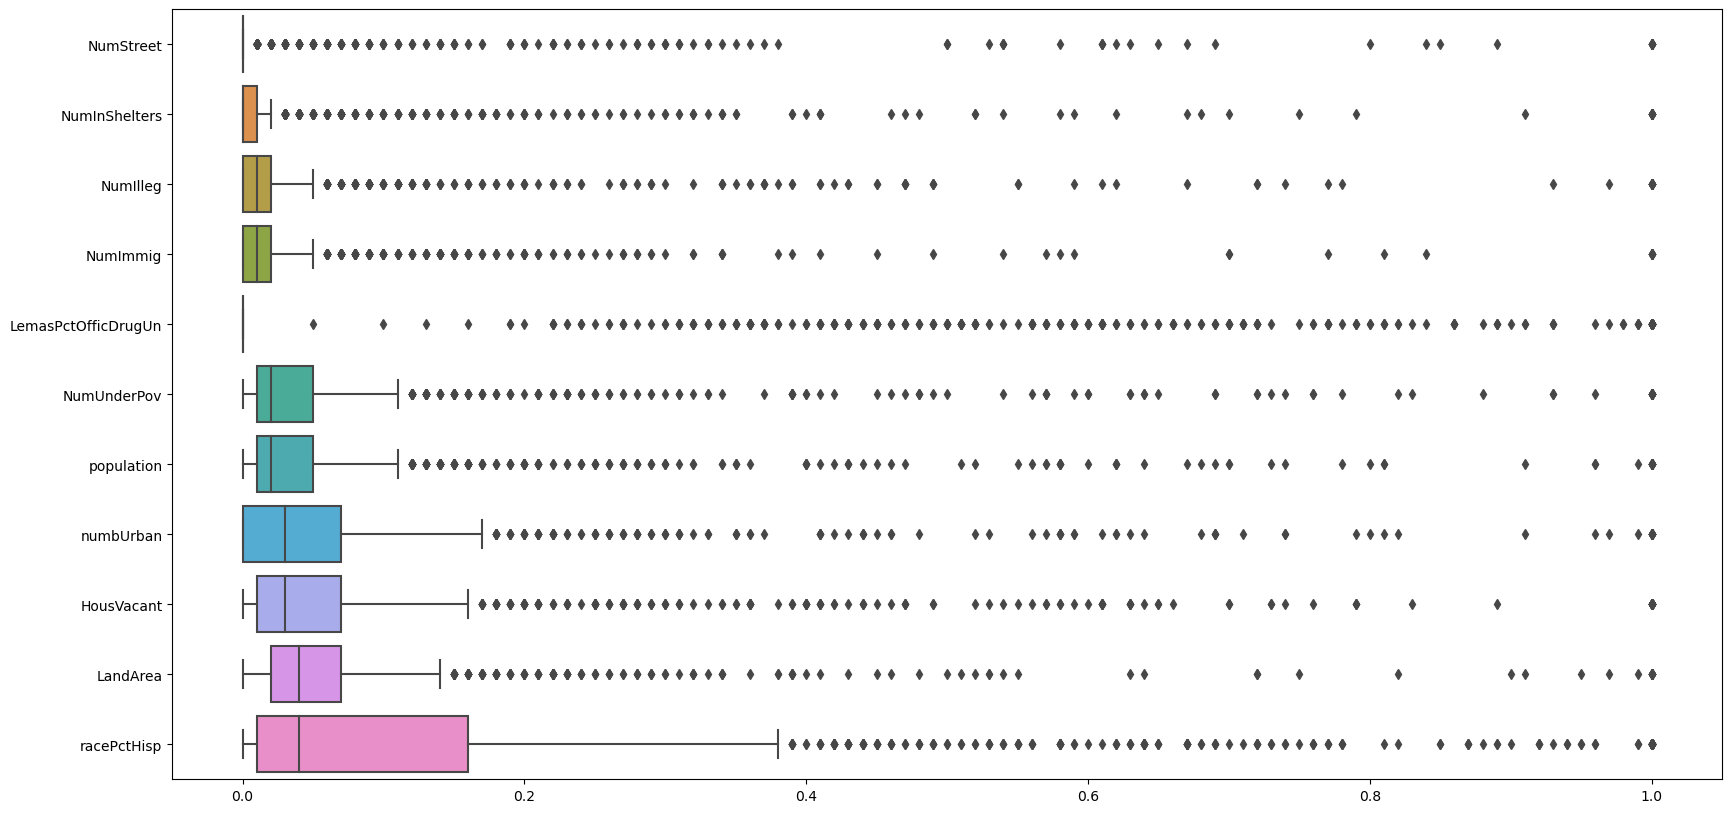

In [25]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=top11_features, orient="h")

The boxplots show us that the distribution range of each of these variables is small. In addition, the box plots show that each of the variables has a significant amount of outliers which are calculated by values that fall under or over Q1 - 1.5 * IQR and Q3 + 1.5 * IQR . We can see a right skew distribution on NumUnderPov and Population and racePtHisp as their medians show significantly more larger data values than smaller values.

# 2(f) Fit a linear model using least squares to the training set and report the test error.

In [26]:
train_df_x = train_df.iloc[:,:-1] 
train_df_y = train_df.iloc[:,-1:]
test_df_x = test_df.iloc[:,:-1]
test_df_y = test_df.iloc[:,-1:]

In [27]:
model = LinearRegression()
model.fit(train_df_x, train_df_y)
y_pred = model.predict(test_df_x)
test_error_mse = mean_squared_error(test_df_y , y_pred)
print("The Test Error Produced by Linear Regression:",test_error_mse)

The Test Error Produced by Linear Regression: 0.01790475726712407


The Test Error Produced by Linear Regression is 0.0179

# 2(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [28]:
ridge_cv = RidgeCV(cv=5)  
ridge_cv.fit(train_df_x, train_df_y)
y_pred = ridge_cv.predict(test_df_x)
test_error = mean_squared_error(test_df_y, y_pred)
print(f"Test Error (MSE) Produced by Ridge Regression: {test_error}")
print(f"Best lambda: {ridge_cv.alpha_}")

Test Error (MSE) Produced by Ridge Regression: 0.017605685455302892
Best lambda: 1.0


The Test Error (MSE) Produced by Ridge Regression was 0.017605 using a lambda of 1.0

# 2(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.

In [29]:
lasso_cv = LassoCV(cv=5, random_state=24) 
lasso_cv.fit(train_df_x, train_df_y)
y_pred = lasso_cv.predict(test_df_x)
test_error = mean_squared_error(test_df_y, y_pred)
selected_features = np.array(train_df_x.columns)[lasso_cv.coef_ != 0]
selected_coefficients = lasso_cv.coef_[lasso_cv.coef_ != 0]
selected_features_df = pd.DataFrame({"Selected Feature":selected_features,"Selected Feature Coeff.": selected_coefficients})
print(f"The best lambda value is: {lasso_cv.alpha_}")
print(f"Mean Squared Test Error WITHOUT Standardization: {test_error}")
print("The Number of Features Selected:",len(selected_features))
pd.set_option('display.max_rows', None)
display(selected_features_df)

The best lambda value is: 0.00012454087437758517
Mean Squared Test Error WITHOUT Standardization: 0.01758981451205437
The Number of Features Selected: 74


,Selected Feature,Selected Feature Coeff.
0,racepctblack,0.267330
1,racePctAsian,-0.014447
2,agePct12t21,0.058831
3,agePct12t29,-0.248864
4,pctUrban,0.040587
5,pctWWage,-0.078335
6,pctWFarmSelf,0.025440
7,pctWInvInc,-0.097472
8,pctWSocSec,0.047396
9,pctWPubAsst,0.038597


The best lambda was around 0.00012 which produced a MSE Test of 0.017589 with 74 features selected WITHOUT standardized features for Lasso regression.

In [30]:
scaler = StandardScaler()
train_df_x_scaled = scaler.fit_transform(train_df_x)
test_df_x_scaled = scaler.transform(test_df_x)

lasso_cv_scaled = LassoCV(cv=5, random_state=24) 
lasso_cv_scaled.fit(train_df_x_scaled, train_df_y)
y_pred_scaled = lasso_cv_scaled.predict(test_df_x_scaled)

test_error_scaled = mean_squared_error(test_df_y, y_pred_scaled)
selected_features = np.array(train_df_x.columns)[lasso_cv_scaled.coef_ != 0]
selected_coefficients = lasso_cv_scaled.coef_[lasso_cv_scaled.coef_ != 0]
selected_features_df = pd.DataFrame({"Selected Feature":selected_features,"Selected Feature Coeff.": selected_coefficients})
print(f"The best lambda value is: {lasso_cv_scaled.alpha_}")
print(f"Mean Squared Test Error WITH Standardization: {test_error_scaled}")
print("The Number of Features Selected:",len(selected_features))
display(selected_features_df)

The best lambda value is: 0.0007630833878262516
Mean Squared Test Error WITH Standardization: 0.017653885152338587
The Number of Features Selected: 72


,Selected Feature,Selected Feature Coeff.
0,racepctblack,0.067258
1,racePctAsian,-0.000846
2,agePct12t21,0.010112
3,agePct12t29,-0.038112
4,pctUrban,0.016611
5,pctWWage,-0.011871
6,pctWFarmSelf,0.004101
7,pctWInvInc,-0.021265
8,pctWSocSec,0.009144
9,pctWPubAsst,0.006463


The best lambda was around 0.0007 which produced a MSE Test of 0.01765 with 72 features selected WITH standardized features for Lasso regression.

In [31]:
comparison_df = pd.DataFrame({"MSE Test WIITHOUT Standardized Features":[test_error],"MSE Test WITH Standardized Features":[test_error_scaled]})
display(comparison_df)

,MSE Test WIITHOUT Standardized Features,MSE Test WITH Standardized Features
0,0.01759,0.017654


There is a very negligble difference in MSE Test for Lasso Regression without and with standardized features. Lasso regression with standardized test features produced an error that was 0.00006 greater than without standardized features.

# 2(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [32]:
pca = PCA()
pca_model = pca.fit_transform(train_df_x_scaled)
linreg = LinearRegression()
mComponents = []
m_mse = []
for m in range(1,123):
    cv_score = cross_val_score(estimator=linreg,X=pca_model[:,0:m],y=train_df_y,cv=5,scoring="neg_mean_squared_error")
    cv_average_mse = -(cv_score.mean()) 
    mComponents.append(m)
    m_mse.append(cv_average_mse)
m_components_mse = pd.DataFrame({"Number of Components":mComponents,"Mean Squared Error":m_mse})
display(m_components_mse)

,Number of Components,Mean Squared Error
0,1,0.031352
1,2,0.028383
2,3,0.027945
3,4,0.027956
4,5,0.026143
5,6,0.026197
6,7,0.025896
7,8,0.021883
8,9,0.021180
9,10,0.021003


The Smallest Train MSE Produced Through All the Components: 0.019465501480472706
The Number of Components that Produced the Smallest Train MSE: 95


Text(0, 0.5, 'Mean Squared Error (MSE)')

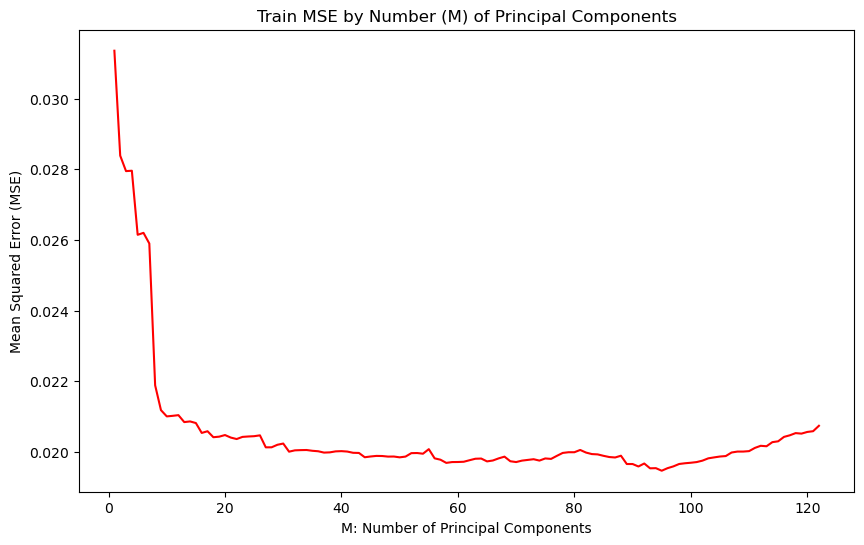

In [33]:
min_mse = min(m_mse)
print("The Smallest Train MSE Produced Through All the Components:", min_mse)
min_index = m_mse.index(min_mse)
print("The Number of Components that Produced the Smallest Train MSE:", mComponents[min_index])
plt.figure(figsize=(10, 6))
plt.plot(mComponents, m_mse, color='r')
plt.title('Train MSE by Number (M) of Principal Components')
plt.xlabel('M: Number of Principal Components')
plt.ylabel('Mean Squared Error (MSE)')

The best MSE Train (0.0194655) was found with 95 components

In [34]:
pca_best = PCA(n_components=95)
pca_best.fit(train_df_x_scaled)  
train_df_x_pca = pca_best.transform(train_df_x_scaled)
test_df_x_pca = pca_best.transform(test_df_x_scaled)

linreg_best = LinearRegression()
linreg_best.fit(train_df_x_pca, train_df_y)

y_pred_test = linreg_best.predict(test_df_x_pca)
mse_test = mean_squared_error(test_df_y, y_pred_test)

print("Mean Squared Error on Test Set from PCR:", mse_test)

Mean Squared Error on Test Set from PCR: 0.018276157428595376


The best MSE Test from PCR with 95 components is 0.018.

# 2(j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost5 to fit the model tree. Determine α (the regularization term) using cross-validation.

In [35]:
xgb_model = xgb.XGBRegressor(random_state=1, reg_lambda=0)  

parameters = {'reg_alpha': np.logspace(-5, 1,num=15)} 
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
grid_search_xgb.fit(train_df_x, train_df_y)

best_alpha = grid_search_xgb.best_params_['reg_alpha']
print(f"Best alpha: {best_alpha}")

y_pred_train = grid_search_xgb.predict(train_df_x)
mse_train = mean_squared_error(train_df_y, y_pred_train)
print(f"Mean Squared Train Error: {mse_train}")

best_xgb_model = xgb.XGBRegressor(reg_alpha=best_alpha,reg_lambda=0,random_state=1)
best_xgb_model.fit(train_df_x, train_df_y)

y_pred_test = best_xgb_model.predict(test_df_x)
mse_test = mean_squared_error(test_df_y, y_pred_test)
print(f"Mean Squared Test Error: {mse_test}")

Best alpha: 1.389495494373136
Mean Squared Train Error: 0.0025674869248054873
Mean Squared Test Error: 0.017455038466202815


The best regularization term (alpha) that was found is 1.389495494373136. It produced a MSE Train of 0.0025 and MSE Test of 0.017455

# References:

https://www.educative.io/answers/regression-using-xgboost-in-python

https://scikit-learn.org/stable/modules/impute.html

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#:~:text=Minimal%20cost%20complexity%20pruning%20recursively,%2C%20scikit%2Dlearn%20provides%20DecisionTreeClassifier.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

https://ethanwicker.com/2021-03-14-principal-components-regression-001/

Utilized KDNugget code for if-then rules